# TFG

## Paula Cabrera Garcia

### Importamos las librerias y cargamos los datos

In [14]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from matplotlib.backends.backend_pdf import PdfPages
import random
import time

In [15]:
fichero = pd.read_csv("RC101.txt", 
                    sep="\t", 
                    escapechar="\\", 
                    engine='python')
datos = {"Etiquetas": fichero["Clientes"], 
         "CoordX": fichero["X"], 
         "CoordY": fichero["Y"], 
         "Demanda": fichero["Demandas"],
         "A": fichero["A"],
         "B": fichero['B'],
         "Servicio": fichero['Servicio']}

In [16]:
fichero

,Clientes,X,Y,Demandas,A,B,Servicio
0,0,40,50,0,0,240,0
1,1,25,85,20,145,175,10
2,2,22,75,30,50,80,10
3,3,22,85,10,109,139,10
4,4,20,80,40,141,171,10
5,5,20,85,20,41,71,10
6,6,18,75,20,95,125,10
7,7,15,75,20,79,109,10
8,8,15,80,10,91,121,10
9,9,10,35,20,91,121,10


### Realizamos un agrupamiento mediante K-means

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
coordenadas=fichero[['X','Y']]

valores_k = range(2, 20)  # Rango de valores de k a probar
puntuaciones_silueta = []  # Almacenará las puntuaciones de silueta para cada valor de k

for k in valores_k:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0)
    kmeans.fit(coordenadas)
    etiquetas = kmeans.labels_
    puntuacion = silhouette_score(coordenadas, etiquetas)
    puntuaciones_silueta.append(puntuacion)



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Etiquetas de cluster asignadas a cada nodo:
[3 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Coordenadas de los centroides de cada cluster:
[[39.  15. ]
 [16.5 75. ]
 [ 9.  40. ]
 [40.  50. ]
 [21.  85. ]
 [ 1.  40. ]
 [39.   5. ]
 [ 6.5 45. ]
 [ 5.  35. ]
 [42.  10. ]
 [22.  75. ]
 [15.  80. ]
 [44.   5. ]
 [10.  35. ]
 [35.   5. ]
 [20.  80. ]
 [ 0.  45. ]
 [25.  85. ]
 [42.  15. ]]


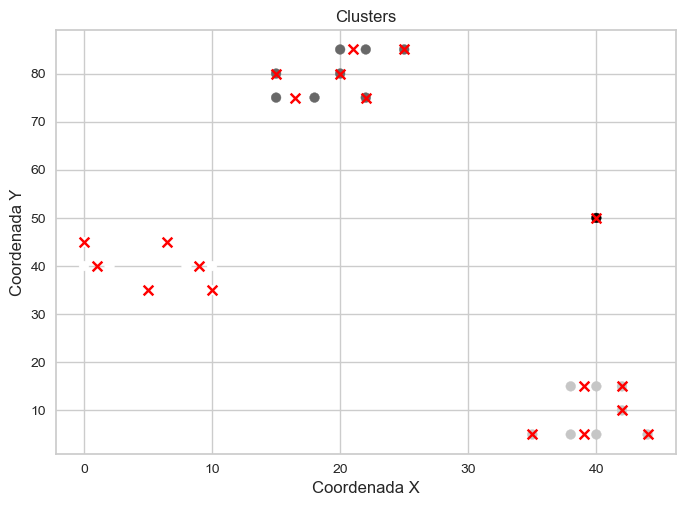

In [18]:
import numpy as np
from sklearn.cluster import KMeans

#k_optimo = valores_k[puntuaciones_silueta.index(max(puntuaciones_silueta))]
k_optimo =4
# Coordenadas de ejemplo (sustituye con tus propios datos)

kmeans_optimo = KMeans(n_clusters=k_optimo, max_iter=300, random_state=0)
kmeans_optimo.fit(coordenadas)
centroids = kmeans_optimo.cluster_centers_
labels = kmeans_optimo.labels_

# Obtener las coordenadas de los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de cluster asignadas a cada nodo:")
print(labels)
print("Coordenadas de los centroides de cada cluster:")
print(centroids)

plt.scatter(coordenadas.iloc[:, 0], coordenadas.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Clusters')
plt.show()


In [19]:
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = [0]
    clusters[label].append(i)

# Imprimir los nodos asignados a cada cluster
for cluster, nodes in clusters.items():
    print(f"Cluster {cluster}: {nodes}")

Cluster 3: [0, 0]
Cluster 2: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Cluster 0: [0, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Cluster 1: [0, 18, 19, 20, 21, 22, 23, 24, 25]


### Añadimos una columna nueva con el cluster asignado

In [20]:
fichero['clusters']=labels

### Creamos las funciones necesarias posteriores

In [21]:
def coste_ruta(seq, A):
    """
    Función que a partir de una ruta de un vehículo y la matriz distancias
    calcula el coste de dicha ruta.
    """
    coste = 0
    for k in range(len(seq)-1):
        coste += A.iloc[seq[k],seq[k+1]]
        
    coste = (int(coste*10))/10
    
    return coste

In [22]:
def crear_solucion(nodos_visitados,demandas):
    """
    """
    cont = 1
    d = 0
    solucion = []
    for i in nodos_visitados:
        cadena = "Ruta "+str(cont)+": "
        for j in i:
            if j == 0:
                cadena += str(j)
            else:
                cadena += " - " + str(j) + "(" + str(demandas[d]) + ")"
                d += 1
        cont += 1
        cadena = cadena[:-1] + " - 0"
        solucion.append(cadena)  
    return solucion

In [23]:
def dibujo_rutas_pdf(lista_rutas, lista_datos, fichero, titulo, colores = ["green","red","blue","orange","cyan", "grey"]):
    nveh = len(lista_rutas)
    dibu = list(zip(lista_datos["CoordX"], lista_datos["CoordY"]))

    with PdfPages(fichero) as pdf:
        fig, ax = plt.subplots()
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titulo)

        for x, y in dibu:
            ax.text(x, y, '●', fontsize=18, fontweight='bold', ha='center', va='center')
        
        for i, (x, y) in enumerate(dibu):
            ax.text(x, y, str(i+1), fontsize=8, fontweight='bold', ha='center', va='center', color='white')

        for i in range(nveh):
            rutas_veh = [dibu[idx] for idx in lista_rutas[i]]
            x, y = zip(*rutas_veh)
            ax.plot(x, y, color=colores[i % len(colores)])

        pdf.savefig()

### Creamos la función VRPTW

In [24]:
def VRPTW(fichero):
    inicial=time.time()
    lista_final=[]
    final=[]
    solucion_final=pd.DataFrame()
    for cluster in clusters:
        df = fichero[fichero['clusters'] == cluster]
        
        coordenadas=fichero[['X','Y']]
        distancias = pdist(coordenadas, metric="euclidean")
        distancias = squareform(distancias)
        distancias = pd.DataFrame(distancias) # Redondeamos la matriz
        distancias = distancias.round(1)
        distancias_devolver = distancias.copy()# Hacemos una copia de la matriz original

        distancias.replace(0, np.inf, inplace=True) # Ponemos los 0 a infinito para no seleccionarlos como mínimo
        distancias_copia = distancias.copy() # Creamos una copia para al repetir el bucle no perder la matriz original con los 0 en infinito

        ventanas=df[['A','B']]
        if df.iloc[0,0]==0:
            ventanas.iloc[0,0]=np.inf
        ventanas1=ventanas.reset_index()

        # Inicializar variables
        num_nodos = len(df) # Número de nodos
        capacidad_camion = 200 # Capacidad total del camión
        capacidad_restante = capacidad_camion # Asignamos la capacidad restante a la capacidad del camión

        lista_demanda = datos["Demanda"].to_list() # Creamos una lista con las demandas

        n_vehiculos = 3 # Número de vehículos
        total_lista = num_nodos+1 # Calculamos el total de la lista

        nodo_actual = 0 # Ponemos el nodo inicial al nodo 1 (0)
        nodos_visitados = [0] # Creamos la ruta de nodos que va a seguir el camión
        lista_acabados = [0] # Lista de nodos que ya hemos dejado toda la demanda
        tiempo=0
        lista_demandas_actualizadas = []
        ventanas_copia=ventanas.copy()
        ventanas_copia1=ventanas1.copy()
        fila0=ventanas1[ventanas1['index']==0]
        pasar_opt=[]
        
        while len(nodos_visitados) < total_lista:
            indice=ventanas1.iloc[:,2].idxmin()
            nodo_siguiente=ventanas1.iloc[indice,0]
            fila=ventanas1[ventanas1['index']==nodo_siguiente]
                        
            if tiempo>fila['B'].values:
                ventanas1.iloc[indice,2]=np.inf


            else:
                tiempo_aux=distancias.iloc[nodo_siguiente,nodo_actual]
                tiempo+=tiempo_aux
                if tiempo<ventanas1.iloc[indice,1]:
                    tiempo=ventanas1.iloc[indice,1]+tiempo_aux


                if lista_demanda[nodo_siguiente]<=capacidad_restante:
                    capacidad_restante-=lista_demanda[nodo_siguiente]
                    tiempo+=fichero.iloc[nodo_siguiente,6]


                    if capacidad_restante==0:              
                        lista_acabados.append(nodo_siguiente)
                        nodos_visitados.append(nodo_siguiente)
                        nodo_actual=0
                        tiempo=0           
                        ventanas1.iloc[indice,2]=np.inf
                        capacidad_restante=capacidad_camion
                        nodos_visitados.append(nodo_actual)

                        if nodo_siguiente!=0:
                            lista_demandas_actualizadas.append(lista_demanda[nodo_siguiente])


                    elif tiempo>ventanas.iloc[0,1]:               
                        ventanas1.iloc[indice,2]=np.inf
                        tiempo=0
                        nodo_actual=0
                        nodos_visitados.append(nodo_siguiente)             
                        capacidad_restante=capacidad_camion
                        if nodo_siguiente!=0:
                            lista_demandas_actualizadas.append(lista_demanda[nodo_siguiente])



                    else:
                        lista_acabados.append(nodo_siguiente)
                        nodos_visitados.append(nodo_siguiente)
                        if nodo_siguiente!=0:
                            lista_demandas_actualizadas.append(lista_demanda[nodo_siguiente])
                        ventanas1.iloc[indice,2]=np.inf
                        nodo_actual=nodo_siguiente


                else:
                    nodo_actual=0
                    tiempo=0
                    nodos_visitados.append(nodo_actual)
                    capacidad_restante=capacidad_camion
                    
        if nodo_siguiente!=0:
            nodos_visitados.append(0)
        lista_final.append(nodos_visitados)
    total=0
    for i in lista_final:
        total+=coste_ruta(i, distancias_devolver)
    solucion = crear_solucion(lista_final,lista_demanda)
    dibujo_rutas_pdf(lista_final, datos, 'VRPTW.pdf', 'VRPTW')
    final1=time.time()
    ejecucion=final1-inicial
    final.append(solucion)
    final.append('Coste de la solución:'+ str(total))
    final.append('Tiempo de ejecución:' +str(ejecucion))
    solucion_final['Solucion']=final
    solucion_final.to_csv('SOLUCION', sep='\t', index=False)
    
    return final


[['Ruta 1: 0 - 0',
  'Ruta 2: 0 - 5(0) - 7(20) - 8(30) - 3(10) - 4(40) - 1(20) - 1(20) - 1(20) - 0',
  'Ruta 3: 0 - 14(10) - 15(20) - 11(30) - 12(40) - 9(20) - 10(10) - 13(10) - 17(20) - 9(20) - 0',
  'Ruta 4: 0 - 23(20) - 21(20) - 19(40) - 18(10) - 22(10) - 20(40) - 24(30) - 25(10) - 0'],
 'Coste de la solución:379.2',
 'Tiempo de ejecución:0.27936506271362305']

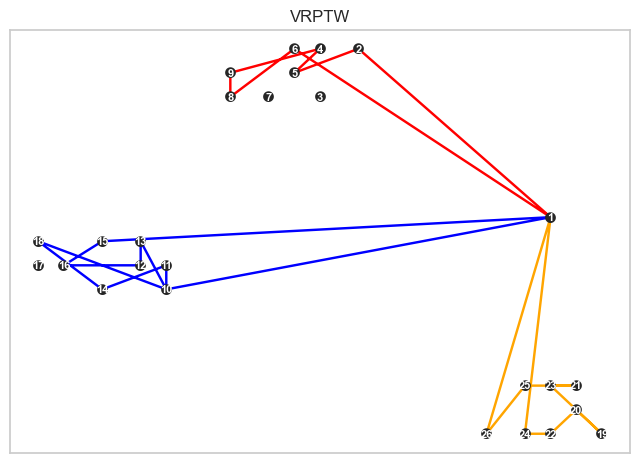

In [25]:
VRPTW(fichero)